<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Clase 1</h3>
    <h5>Ejercicio 1</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago <p>
</div>

Importamos modulos a utilizar

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

####  Leemos los datos a trabajar


In [69]:
url='https://raw.githubusercontent.com/sebcalcagno/AnalisisSeriesTemporales/main/Index2018.csv'
raw_csv_data = pd.read_csv(url)
df_comp=raw_csv_data.copy()

#### Breve resumen del dataset


In [70]:
df_comp.head(10)

,date,spx,dax,ftse,nikkei
0,7/1/1994,469.90,2224.95,3445.98,18124.01
1,10/1/1994,475.27,2225.00,3440.58,18443.44
2,11/1/1994,474.13,2228.10,3413.77,18485.25
3,12/1/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26
5,14/01/1994,474.91,2151.05,3400.56,18973.70
6,17/01/1994,473.30,2115.56,3407.83,18725.37
7,18/01/1994,474.25,2130.35,3437.01,18514.55
8,19/01/1994,474.30,2132.52,3475.15,19039.40
9,20/01/1994,474.98,2098.36,3469.99,19183.92


In [71]:
df_comp.spx.mean()

1288.6425471322289

In [72]:
df_comp.date.describe()

count         6277
unique        6277
top       7/1/1994
freq             1
Name: date, dtype: object

In [73]:
df_comp.dtypes

date       object
spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object

Adaptamos el dataset para trabajarlo segun sus series temporales

In [74]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)

In [75]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [76]:
df_comp.date.describe()

count                   6277
mean     2006-01-18 00:00:00
min      1994-01-07 00:00:00
25%      2000-01-13 00:00:00
50%      2006-01-18 00:00:00
75%      2012-01-24 00:00:00
max      2018-01-29 00:00:00
Name: date, dtype: object

In [77]:
df_comp.dtypes

date      datetime64[ns]
spx              float64
dax              float64
ftse             float64
nikkei           float64
dtype: object

Seteamos como index del dataset segun el dia

In [78]:
df_comp.set_index("date")

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [79]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [80]:
df_comp.set_index("date", inplace=True)
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


#### Adaptamos el datset segun la frecuencia de la serie temporal dada, donde:

- h: por hora
- w: semanal
- d: diario
- m: mensual
- b: dias laborables



In [81]:
df_comp=df_comp.asfreq('d')
df_comp

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
...,...,...,...,...
2018-01-25,2839.253031,13298.36,7615.839954,23669.49
2018-01-26,2872.867839,13340.17,7665.541292,23631.88
2018-01-27,NaN,NaN,NaN,NaN


In [82]:
df_comp=df_comp.asfreq('b')
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [83]:
df_comp.isna()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,False,False,False,False
1994-01-10,False,False,False,False
1994-01-11,False,False,False,False
1994-01-12,False,False,False,False
1994-01-13,False,False,False,False
...,...,...,...,...
2018-01-23,False,False,False,False
2018-01-24,False,False,False,False
2018-01-25,False,False,False,False


In [84]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

Visualizamos una vez mas el dataset, pero esta vez teniendo en cuenta la serie temporal

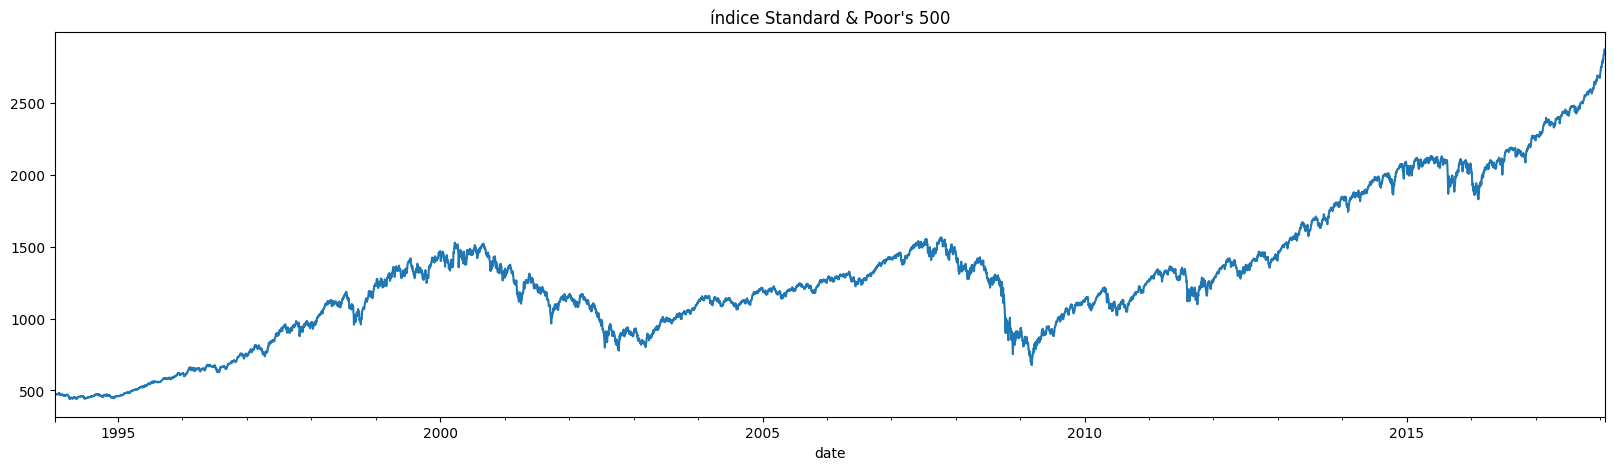

In [85]:
df_comp.spx.plot(figsize=(20,5), title = "índice Standard & Poor's 500")
plt.show()

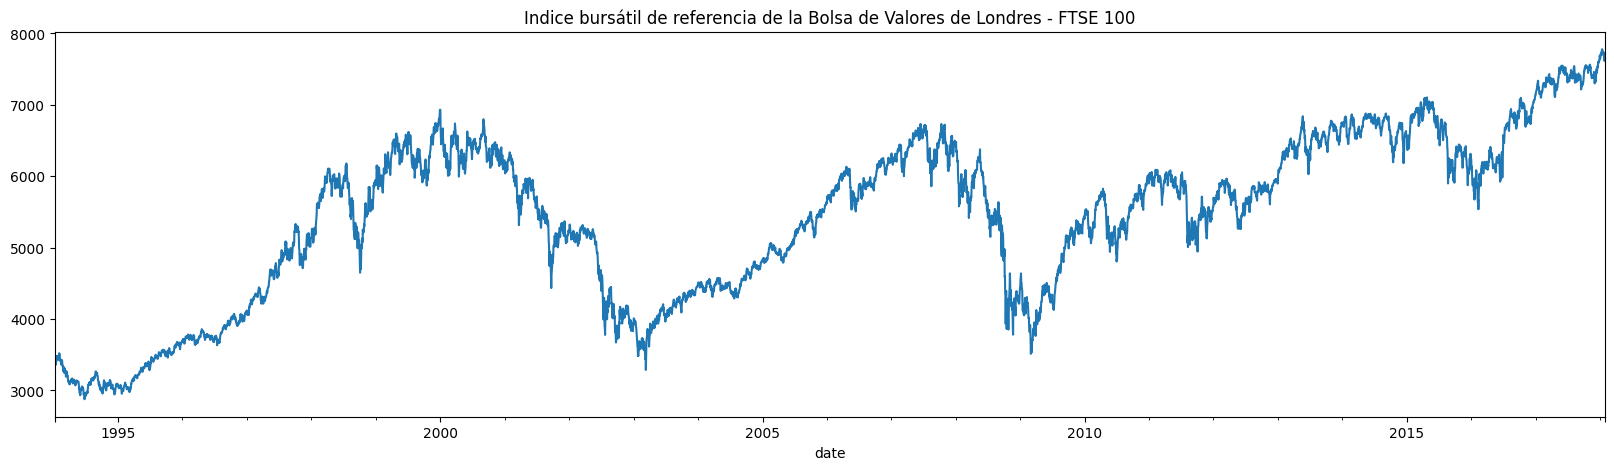

In [86]:
df_comp.ftse.plot(figsize=(20,5), title = "Indice bursátil de referencia de la Bolsa de Valores de Londres - FTSE 100")
plt.show()

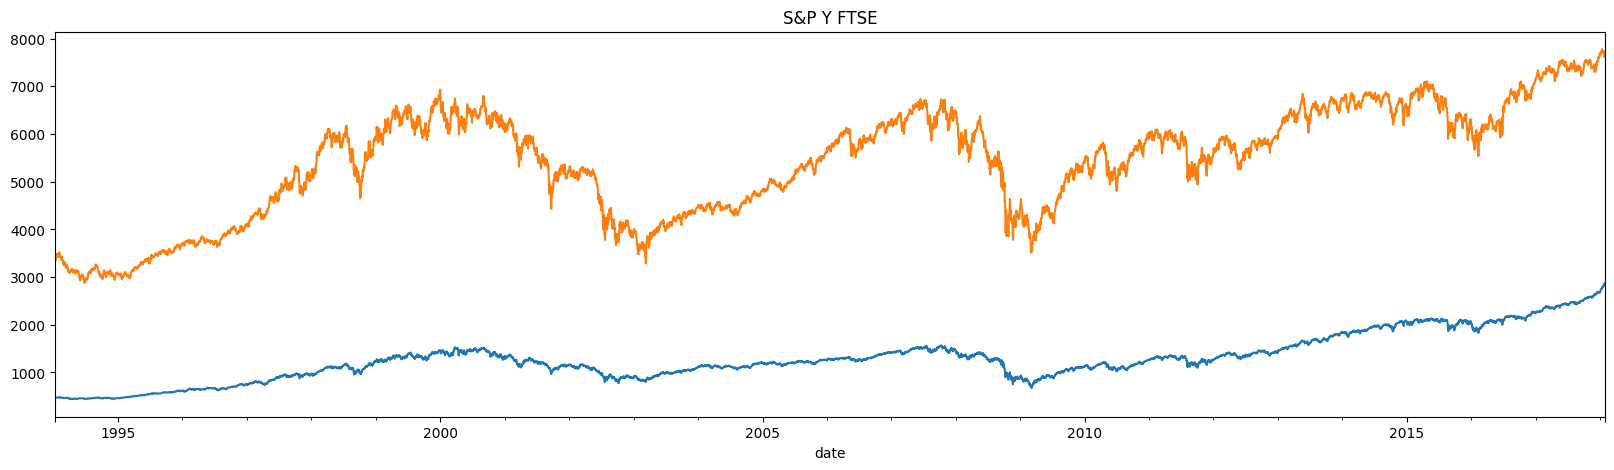

In [87]:
df_comp.spx.plot(figsize=(20,5))
df_comp.ftse.plot(figsize=(20,5))
plt.title("S&P Y FTSE")
plt.show()

Descomposición de Series Temporales

In [88]:
#!pip install statsmodels

In [89]:
# Modulo para uso exclusivo aqui
from statsmodels.tsa.seasonal import seasonal_decompose

Descomposicion Aditiva

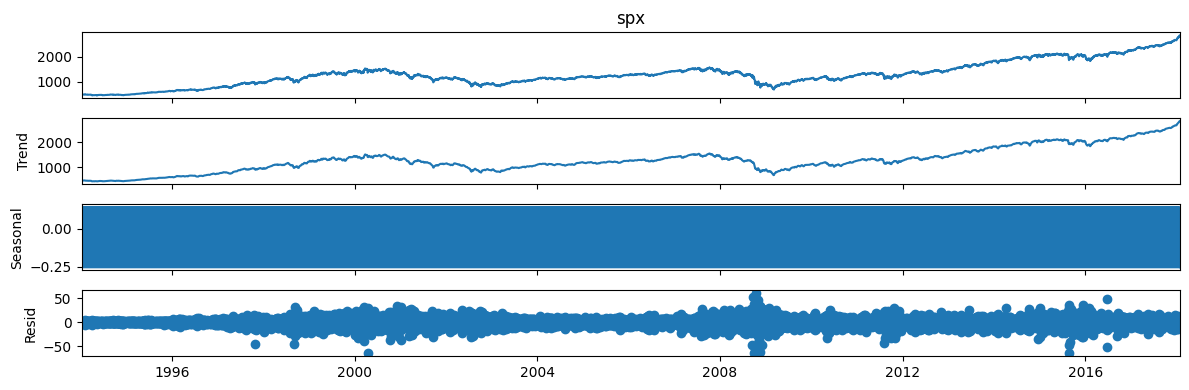

In [90]:
s_dec_additive = seasonal_decompose(df_comp.spx, model = "additive")
s_dec_additive.plot()
plt.show()

Descomposicion Multiplicativa

In [91]:
import matplotlib

matplotlib.rcParams['figure.figsize']=[12,8]

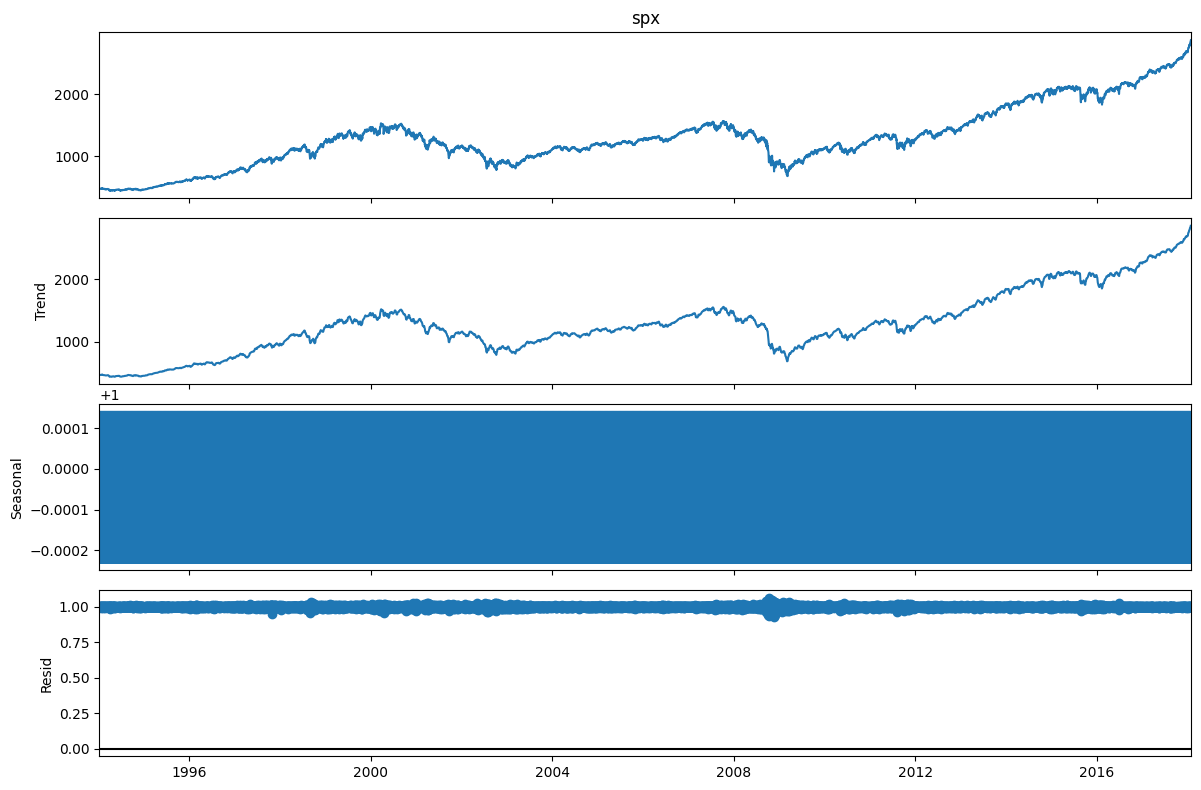

In [92]:
s_dec_multiplicative = seasonal_decompose(df_comp.spx, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

Representación gráfica de la Función de Autocorrelación

In [93]:
# Modulo para uso exclusivo a partir de aqui
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

In [94]:
matplotlib.rcParams['figure.figsize']=[12,4]

Grafico ACF del indice Standard & Poor's 500 (SPX)

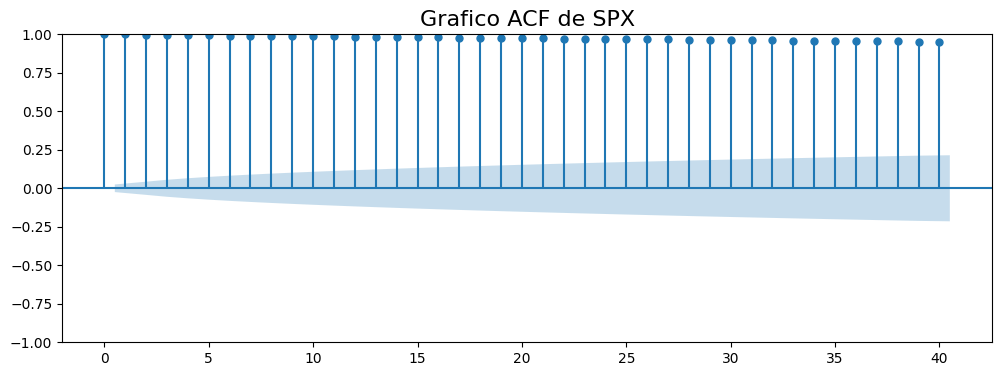

In [95]:
plot_acf(df_comp.spx,lags=40)
plt.title("Grafico ACF de SPX", size= 16)
plt.show()

Grafico ACF del indice "DAX"

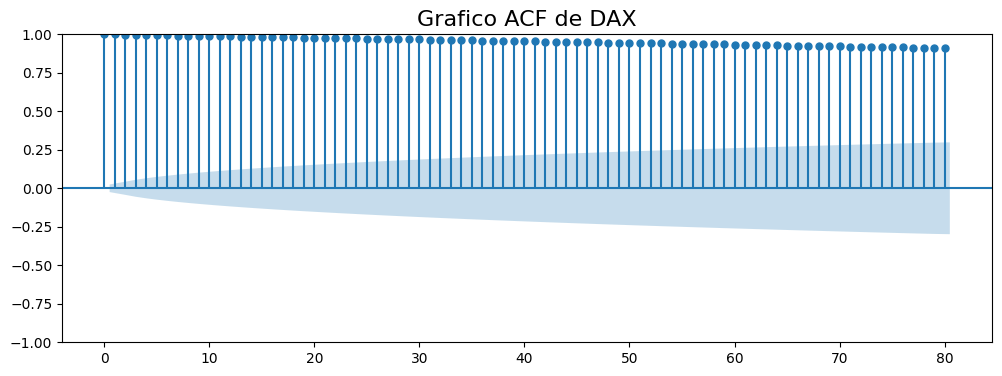

In [96]:
plot_acf(df_comp.dax,lags=80)
plt.title("Grafico ACF de DAX", size= 16)
plt.show()

Grafico ACF del indice "ftse"

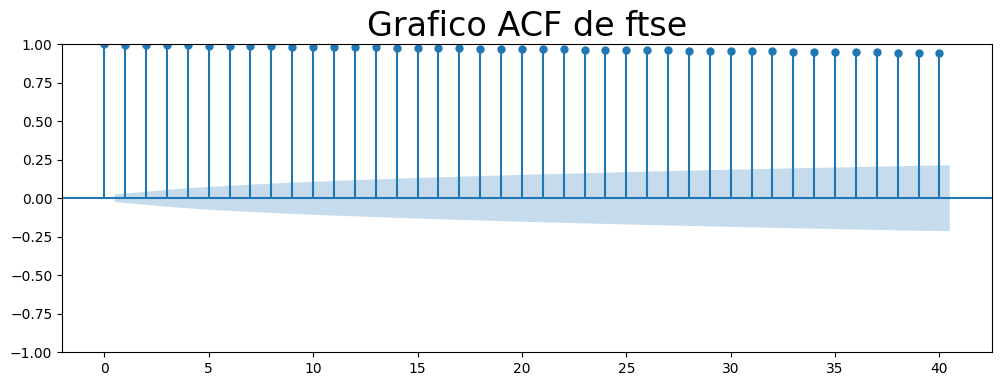

In [97]:
plot_acf(df_comp.ftse,lags=40)
plt.title("Grafico ACF de ftse", size= 24)
plt.show()

Grafico ACF del indice "nikkei"

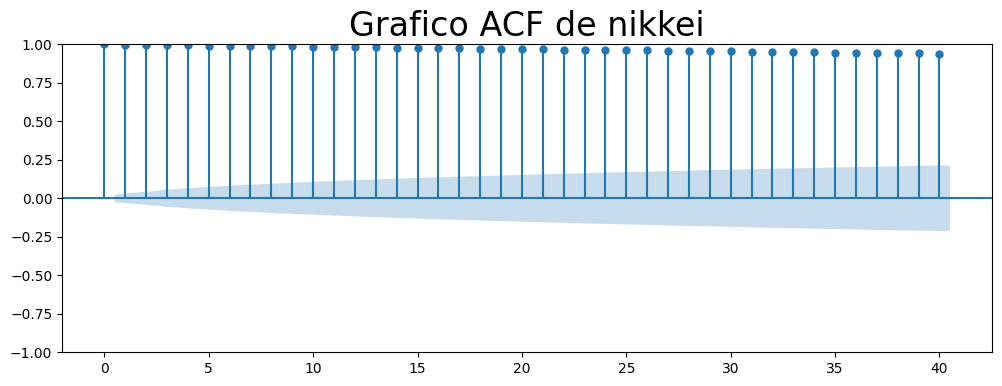

In [98]:
plot_acf(df_comp.nikkei,lags=40)
plt.title("Grafico ACF de nikkei", size= 24)
plt.show()

APLICAMOS UNA TRANSFORMACION DE LA SERIE

In [99]:
primera_diffs=df_comp.spx.values[1:]-df_comp.spx.values[:-1]
primera_diffs=np.concatenate([primera_diffs,[0]])

In [100]:
df_comp['primera_diffs_spx']=primera_diffs

In [101]:
df_comp.head()

,spx,dax,ftse,nikkei,primera_diffs_spx
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,5.37
1994-01-10,475.27,2225.00,3440.58,18443.44,-1.14
1994-01-11,474.13,2228.10,3413.77,18485.25,0.04
1994-01-12,474.17,2182.06,3372.02,18793.88,-1.70
1994-01-13,472.47,2142.37,3360.01,18577.26,2.44


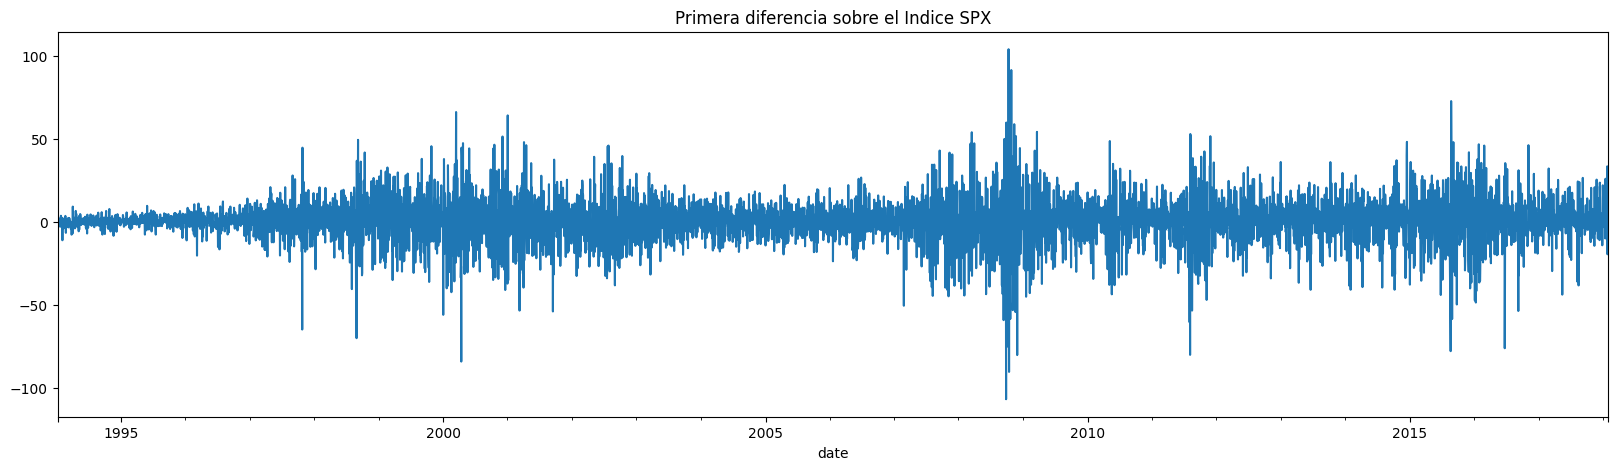

In [102]:
#grafico este indice con las diferencias aplicadas fila a fila
df_comp.primera_diffs_spx.plot(figsize=(20,5), title = "Primera diferencia sobre el Indice SPX")
plt.show()

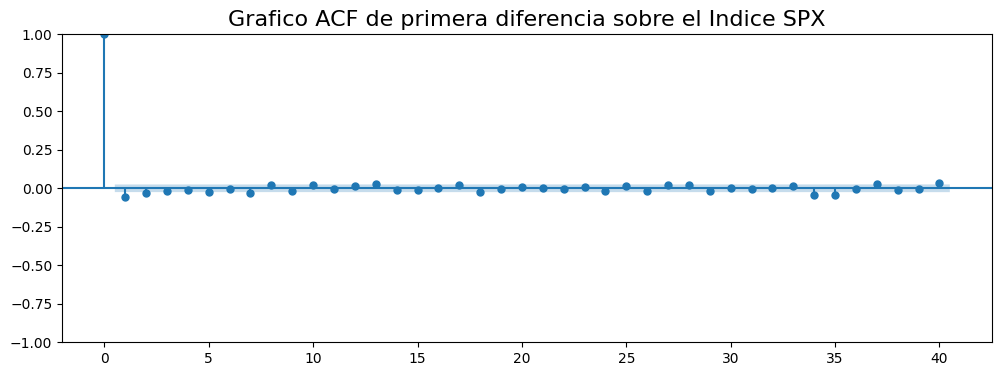

In [103]:
plot_acf(df_comp.primera_diffs_spx,lags=40)
plt.title("Grafico ACF de primera diferencia sobre el Indice SPX", size= 16)
plt.show()

Ruido Blanco

In [104]:
wn = np.random.normal(loc = df_comp.spx.mean(), scale = df_comp.spx.std(), size = len(df_comp))
df_comp['wn'] = wn
df_comp.describe()

,spx,dax,ftse,nikkei,primera_diffs_spx,wn
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6083.381061,5423.679824,14597.672753,0.379740,1287.711211
std,487.868210,2755.563853,1145.616719,4043.795272,13.552138,495.666198
min,438.920000,1911.700000,2876.600000,7054.980000,-106.621812,-523.355734
25%,992.715221,4070.460000,4486.730000,10701.130000,-5.194203,952.037724
50%,1233.761241,5774.260000,5663.300000,15030.510000,0.305038,1286.089142
75%,1460.250000,7445.560000,6304.630175,17860.470000,6.586405,1614.959753
max,2872.867839,13559.600000,7778.637689,24124.150000,104.136873,3194.799284


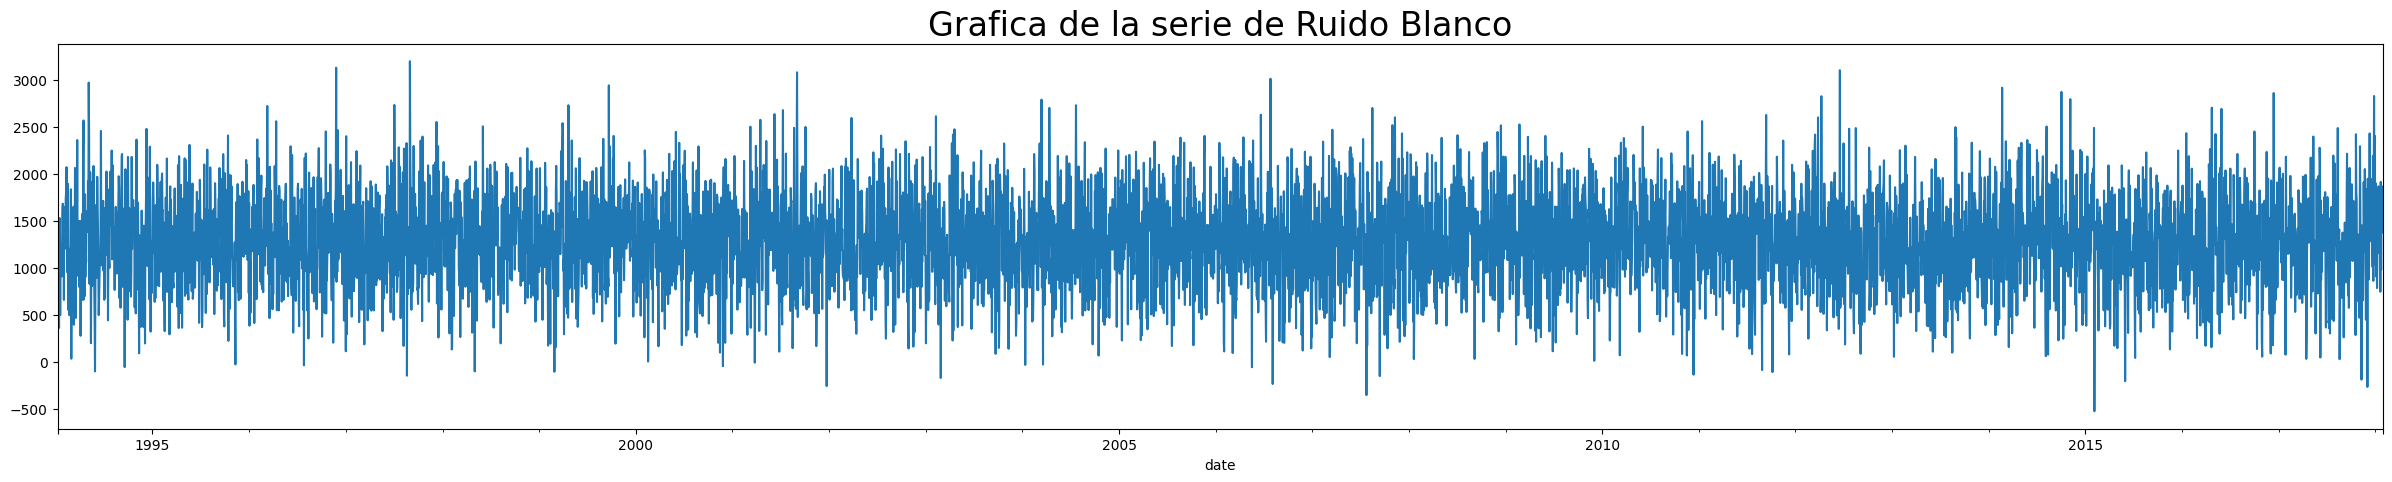

In [105]:
df_comp.wn.plot(figsize = (30,5))
plt.title("Grafica de la serie de Ruido Blanco", size= 24)
plt.show()

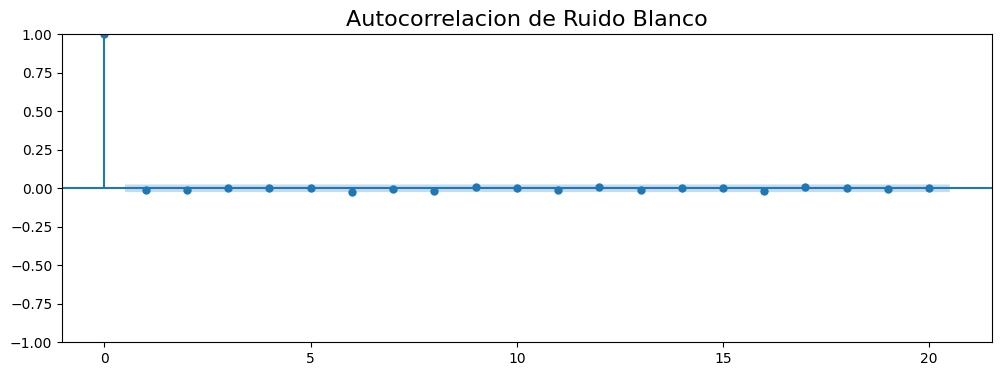

In [106]:
plot_acf(df_comp.wn, lags=20)
plt.title("Autocorrelacion de Ruido Blanco", size= 16)
plt.show()

Random Walk

In [107]:
# Simulamos el proceso
steps = np.random.standard_normal(1000)
steps[0]=0
random_walk=np.cumsum(steps)

In [108]:
random_walk[:10]

array([0.        , 0.38330581, 1.02463756, 0.48923185, 0.75276687,
       0.08139945, 0.38585893, 0.85572932, 1.35078168, 1.15667157])

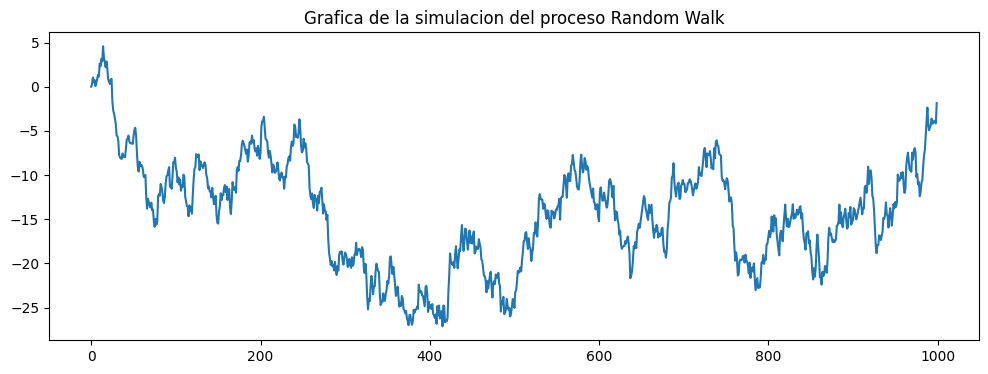

In [109]:
plt.plot(random_walk)
plt.title("Grafica de la simulacion del proceso Random Walk")
plt.show()

In [110]:
random_walk_acf_coef = acf(random_walk)
random_walk_acf_coef

array([1.        , 0.9817315 , 0.96360208, 0.94587933, 0.92981584,
       0.91264026, 0.89564579, 0.87796587, 0.86047125, 0.84301629,
       0.8263776 , 0.80957077, 0.79108626, 0.77390117, 0.75764174,
       0.74082946, 0.7240125 , 0.7085895 , 0.69492386, 0.68174944,
       0.66793451, 0.65329145, 0.6388316 , 0.62626185, 0.61376733,
       0.60168167, 0.59040209, 0.58001401, 0.57037441, 0.56118367,
       0.55154953])

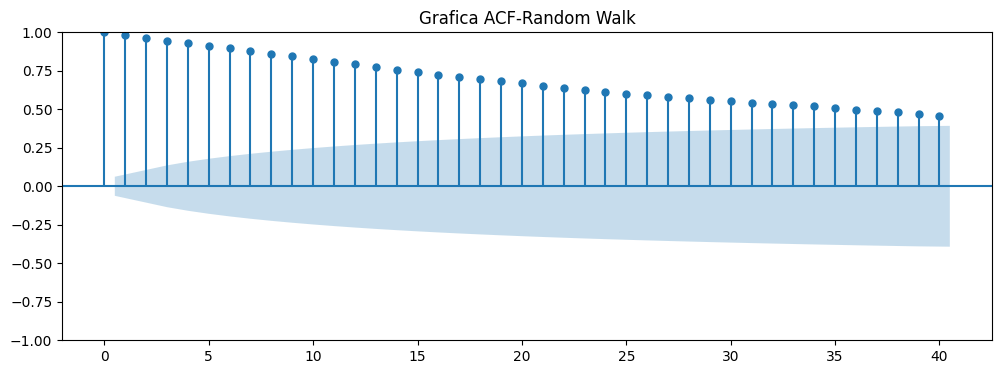

In [111]:
plot_acf(random_walk, lags=40)
plt.title("Grafica ACF-Random Walk")
plt.show()

<body>
  <h1> Muchas gracias! 😀</h1>
</body>